In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
import pandas as pd
df_iris = pd.read_csv("iris.csv", sep=',')
df_iris.columns = ["Id", "sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm","class"]
df_iris.sample(10)

,Id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
25,26,5.0,3.0,1.6,0.2,Iris-setosa
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
42,43,4.4,3.2,1.3,0.2,Iris-setosa
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
1,2,4.9,3.0,1.4,0.2,Iris-setosa
138,139,6.0,3.0,4.8,1.8,Iris-virginica
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
104,105,6.5,3.0,5.8,2.2,Iris-virginica
73,74,6.1,2.8,4.7,1.2,Iris-versicolor


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [3]:
df_iris.isnull().sum()

Id                    0
sepal length in cm    1
sepal width in cm     2
petal length in cm    2
petal width in cm     1
class                 0
dtype: int64

In [4]:
df_iris = df_iris.fillna(df_iris.median())
df_iris.isnull().sum()

Id                    0
sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_iris["class"] = le.fit_transform(df_iris["class"])


In [6]:
df_iris["class"].unique()

array([0, 1, 2])

In [7]:
df_iris.head(2)

,Id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [8]:

corr_matrix = df_iris.corr()

In [9]:
corr_matrix["class"]

Id                    0.942753
sepal length in cm    0.775061
sepal width in cm    -0.417318
petal length in cm    0.944477
petal width in cm     0.952513
class                 1.000000
Name: class, dtype: float64

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [10]:
df_iris_features = df_iris[["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm"]]
df_iris_target = df_iris["class"]
df_iris_features.var()

sepal length in cm    0.676645
sepal width in cm     0.185552
petal length in cm    3.076516
petal width in cm     0.577141
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1032ea0f0>,
      dtype=object)

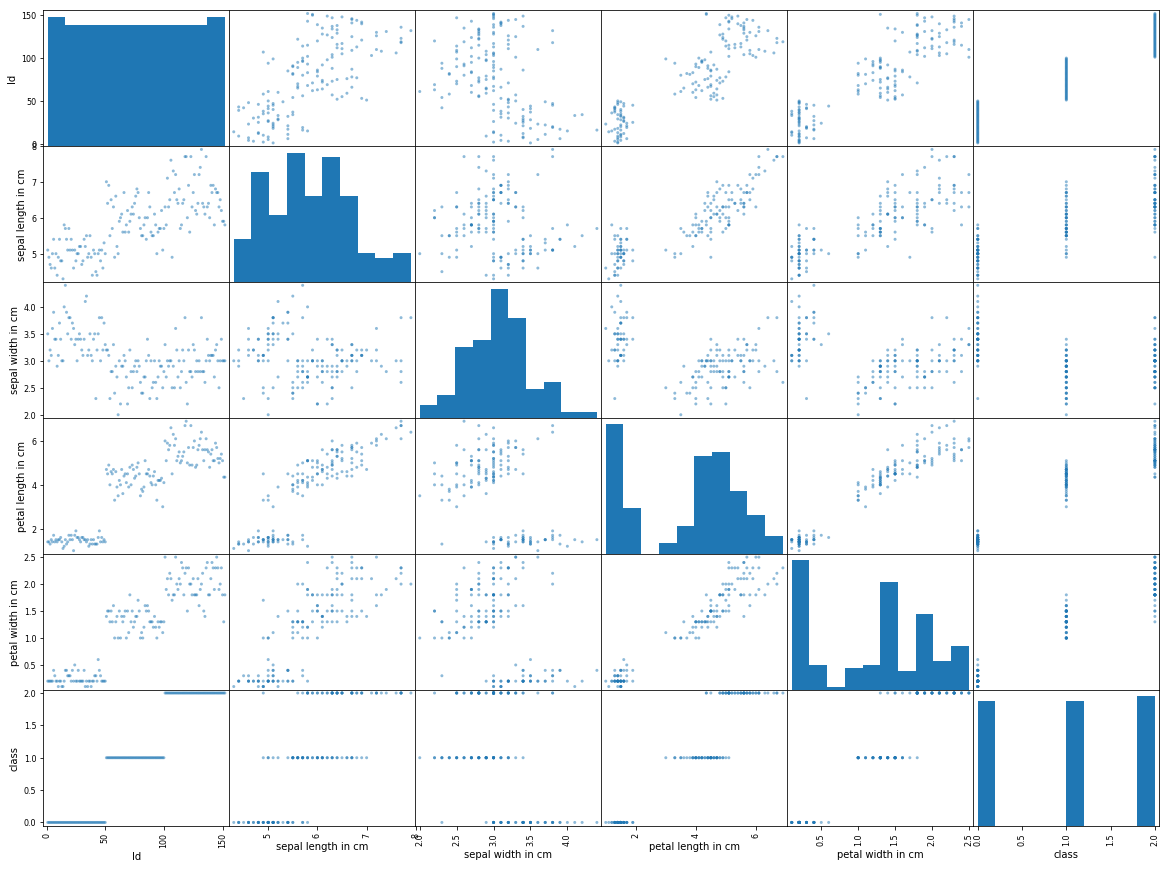

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.scatter_matrix(df_iris, figsize=(20, 15))

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [12]:
from sklearn.model_selection import train_test_split
df_iris_test, df_iris_train = train_test_split(df_iris, test_size = 0.2, random_state = 0)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_iris_features, df_iris_target, test_size = 0.2, random_state = 0)

print("Data shape: ", df_iris.shape)
print("Train feature shape: ", X_train.shape)
print("Test feature shape: ", X_test.shape)
print("Train Target shape: ", y_train.shape)
print("Test feature shape: ", y_test.shape)


Data shape:  (152, 6)
Train feature shape:  (121, 4)
Test feature shape:  (31, 4)
Train Target shape:  (121,)
Test feature shape:  (31,)



## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy @ n_neighbors=3:",metrics.accuracy_score(y_test, y_pred))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy @ n_neighbors=5:",metrics.accuracy_score(y_test, y_pred))


knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy @ n_neighbors=9:",metrics.accuracy_score(y_test, y_pred))




Accuracy @ n_neighbors=3: 0.967741935483871
Accuracy @ n_neighbors=5: 0.967741935483871
Accuracy @ n_neighbors=9: 0.967741935483871


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [15]:
import numpy as np
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
myList = list(range(0,20))
# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 == 1, myList)
neighbors_list = [num for num in myList if num % 2 == 1] 
print(neighbors_list)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


In [16]:

# empty list that will hold cv scores
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, scoring='accuracy')
    cv_scores.append(scores.mean())

In [17]:
# changing to misclassification error and find minimum 
MSE = [1 - x for x in cv_scores]
optimal_k = neighbors_list[MSE.index(min(MSE))] 
print("The optimal number of neighbors is", optimal_k, 'with min MSE value of', min(MSE))


The optimal number of neighbors is 9 with min MSE value of 0.024593495934959297


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

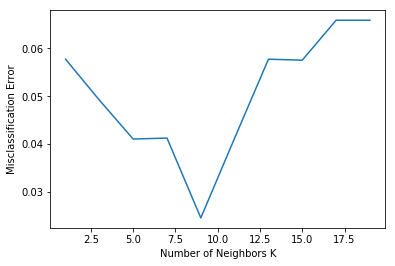

In [18]:
# plot misclassification error vs k
plt.plot(neighbors_list, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### Question 11: Read the data given in bc2.csv file

In [19]:
df_bc2 = pd.read_csv("bc2.csv")
df_bc2.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


### Question 12: Observe the no.of records in dataset and type of each feature 

In [20]:
len(df_bc2.index)

699

In [21]:
df_bc2.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Question 13: Use summary statistics to check if missing values, outlier and encoding treament is necessary

In [22]:
df_bc2.describe(include='all')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


### Check Missing Values

In [23]:
df_bc2.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Question 14: Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [24]:
df_bc2[df_bc2["Bare Nuclei"]=='?']["Bare Nuclei"].count()

16

In [25]:
df_bc2["Bare Nuclei"].describe(include='all')

count     699
unique     11
top         1
freq      402
Name: Bare Nuclei, dtype: object

In [26]:
df_bc2["Bare Nuclei"] = df_bc2["Bare Nuclei"].replace(to_replace =["?"], value ="1")
df_bc2["Bare Nuclei"].head(10)

0     1
1    10
2     2
3     4
4     1
5    10
6    10
7     1
8     1
9     1
Name: Bare Nuclei, dtype: object

### Question 15: Find the distribution of target variable (Class) 

In [27]:
df_bc2['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

#### Plot the distribution of target variable using histogram

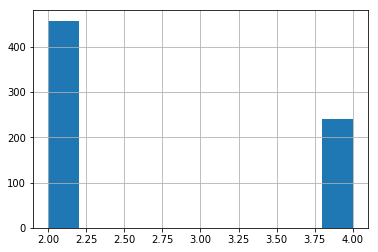

In [28]:
df_bc2["Class"].hist()

### convert the datatype of Bare Nuclei to `int`

In [29]:
df_bc2["Bare Nuclei"] = df_bc2["Bare Nuclei"].astype('int64')

In [30]:
df_bc2["Bare Nuclei"].dtypes

dtype('int64')

### Question 16: Standardization of Data

In [31]:
from sklearn import preprocessing
scaled_data = preprocessing.scale(df_bc2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


In [32]:
scaled_df_bc2 = pd.DataFrame(scaled_data)
scaled_df_bc2.columns = ['ID',
 'ClumpThickness',
 'Cell Size',
 'Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Normal Nucleoli',
 'Bland Chromatin',
 'Mitoses',
 'Class']
scaled_df_bc2.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,-0.116239,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397
1,-0.111504,0.206936,0.283845,0.266875,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912,-0.725397
2,-0.091265,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912,-0.725397
3,-0.089884,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912,-0.725397
4,-0.088674,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397
5,-0.088513,1.273138,2.251526,2.287222,1.820022,1.710106,1.799664,2.282766,1.354454,-0.343912,1.378555
6,-0.086929,-1.214667,-0.699995,-0.743299,-0.633247,-0.549561,1.799664,-0.179662,-0.611825,-0.343912,-0.725397
7,-0.086180,-0.859266,-0.699995,-0.406574,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397
8,-0.062638,-0.859266,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-1.000471,-0.611825,1.990014,-0.725397
9,-0.062638,-0.148465,-0.372048,-0.743299,-0.633247,-0.549561,-0.686979,-0.590067,-0.611825,-0.343912,-0.725397


### Question 17: Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

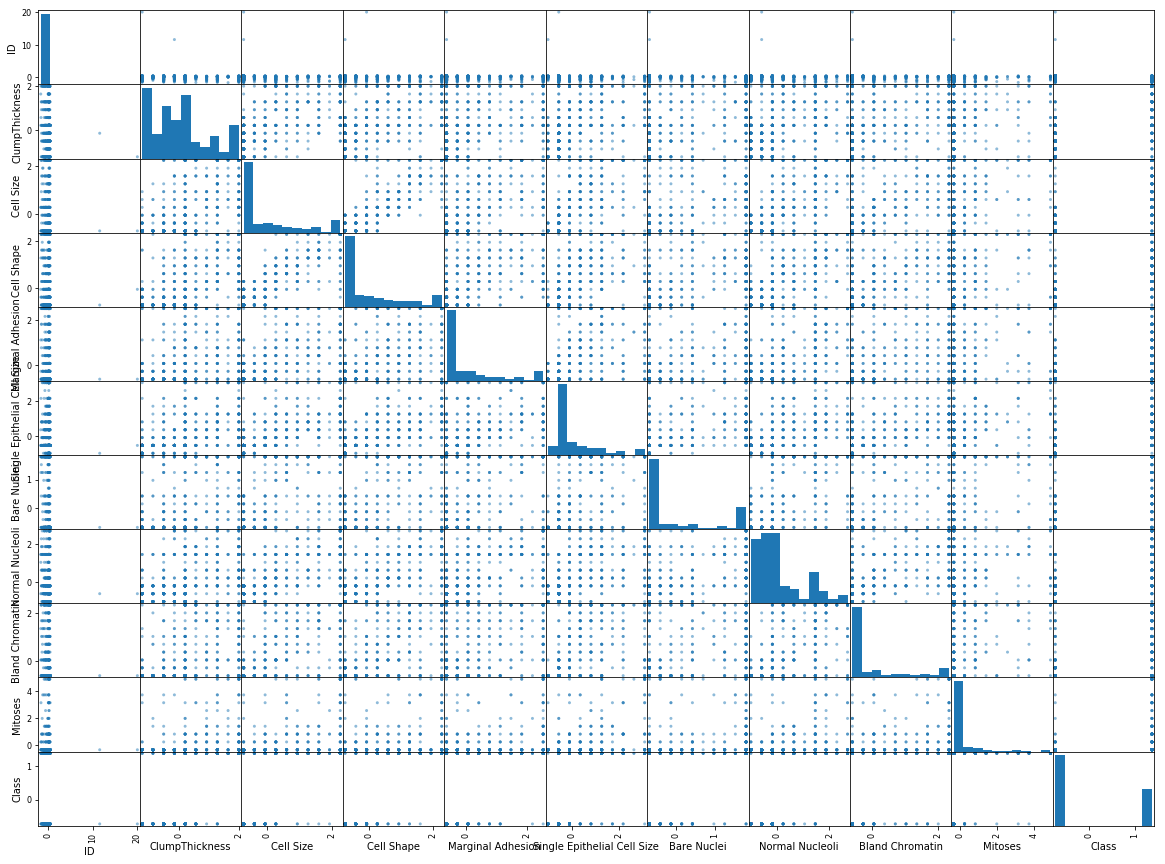

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.scatter_matrix(scaled_df_bc2, figsize=(20, 15))
plt.show()

In [34]:
# Create correlation matrix
corr_matrix = scaled_df_bc2.corr().abs()

# upper triangle of corr_matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print("To drop: ", to_drop)

To drop:  []


In [35]:
# Drop features 
scaled_df_bc2.drop(scaled_df_bc2[to_drop], axis=1)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,-0.116239,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397
1,-0.111504,0.206936,0.283845,0.266875,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912,-0.725397
2,-0.091265,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912,-0.725397
3,-0.089884,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912,-0.725397
4,-0.088674,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397
5,-0.088513,1.273138,2.251526,2.287222,1.820022,1.710106,1.799664,2.282766,1.354454,-0.343912,1.378555
6,-0.086929,-1.214667,-0.699995,-0.743299,-0.633247,-0.549561,1.799664,-0.179662,-0.611825,-0.343912,-0.725397
7,-0.086180,-0.859266,-0.699995,-0.406574,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397
8,-0.062638,-0.859266,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-1.000471,-0.611825,1.990014,-0.725397
9,-0.062638,-0.148465,-0.372048,-0.743299,-0.633247,-0.549561,-0.686979,-0.590067,-0.611825,-0.343912,-0.725397


### Question 18: Divide the dataset into feature set and target set

In [36]:
X_feature = scaled_df_bc2[['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses']]
X_target = scaled_df_bc2['Class']

### Divide the Training and Test sets in 70:30 

In [37]:
from sklearn.model_selection import train_test_split
X_bc2_train, X_bc2_test, y_bc2_train, y_bc2_test = train_test_split(X_feature, X_target, test_size = 0.3, random_state = 0)

print("Data shape: ", scaled_df_bc2.shape)
print("Train feature shape: ", X_bc2_train.shape)
print("Test feature shape: ", X_bc2_test.shape)
print("Train Target shape: ", y_bc2_train.shape)
print("Test feature shape: ", y_bc2_test.shape)


Data shape:  (699, 11)
Train feature shape:  (489, 10)
Test feature shape:  (210, 10)
Train Target shape:  (489,)
Test feature shape:  (210,)


## Question 19 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [38]:
import numpy as np
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
myList = list(range(0,20))
# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 == 1, myList)
neighbors_list = [num for num in myList if num % 2 == 1] 
print(neighbors_list)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


In [39]:
lab_enc = preprocessing.LabelEncoder()
y_bc2_train_encoded = lab_enc.fit_transform(y_bc2_train)

# empty list that will hold cv scores
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_bc2_train, y_bc2_train_encoded, scoring='accuracy')
    cv_scores.append(scores.mean())

In [40]:
# changing to misclassification error and find minimum 
MSE = [1 - x for x in cv_scores]
MSE

[0.040888403657951655,
 0.03269566722024875,
 0.036823363007545074,
 0.03273322951361768,
 0.03479084268234178,
 0.03274585290729082,
 0.030688239738566492,
 0.030688239738566492,
 0.030688239738566492,
 0.03273322951361768]

### Question 20: Print the optimal number of neighbors

In [41]:

optimal_k = neighbors_list[MSE.index(min(MSE))] 
print("The optimal number of neighbors is", optimal_k, 'with min MSE value of', min(MSE))

The optimal number of neighbors is 13 with min MSE value of 0.030688239738566492
